<a href="https://colab.research.google.com/github/imazerty/Edge-detection/blob/master/FreichenPrewittKirschNevatiaBabuRobertRobinsonSobel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
def boxFilter(originalImage, boxWidth, boxHeight):
    """
    :type originalImage: Image (from PIL)
    :type boxWidth: integer
    :type boxHeight: integer
    :return type: Image (from PIL)
    """
    # Calculate center of kernel.
    centerKernel = (boxWidth // 2, boxHeight // 2)
    # Copy image from origianl image.
    boxFilterImage = originalImage.copy()
    # Scan each column in original image.
    for c in range(originalImage.size[0]):
        # Scan each row in original image.
        for r in range(originalImage.size[1]):
            # Create empty list.
            boxPixels = []
            # Scan each column in box.
            for x in range(boxWidth):
                # Scan each row in box.
                for y in range(boxHeight):
                    # Calculate destination x, y position.
                    destX = c + (x - centerKernel[0])
                    destY = r + (y - centerKernel[1])
                    # Avoid out of image range.
                    if ((0 <= destX < originalImage.size[0]) and \
                        (0 <= destY < originalImage.size[1])):
                        # Get pixel value in original image at (destX, destY).
                        originalPixel = originalImage.getpixel((destX, destY))
                        
                        # Append pixel to list.
                        boxPixels.append(originalPixel)
            boxFilterImage.putpixel((c, r), int(sum(boxPixels) / len(boxPixels)))
    return boxFilterImage

def getRobertsImage(originalImage, threshold):
    """
    :type originalImage: Image (from PIL)
    :type threshold: float
    :return type: Image (from PIL)
    """
    from PIL import Image
    import math
    # New image with the same size and 'binary' format.
    robertsImage = Image.new('1', originalImage.size)
    # Scan each column in original image.
    for c in range(originalImage.size[0]):
        # Scan each row in original image.
        for r in range(originalImage.size[1]):
            # Calculate x0, y0, x1, y1 and avoid out of image range.
            x0 = c
            y0 = r
            x1 = min(c + 1, originalImage.size[0] - 1)
            y1 = min(r + 1, originalImage.size[1] - 1)
            # Calculate r1 and r2 of Robert.
            r1 = -originalImage.getpixel((x0, y0)) + originalImage.getpixel((x1, y1))
            r2 = -originalImage.getpixel((x1, y0)) + originalImage.getpixel((x0, y1))
            # Calulate Grandient magnitude.
            magnitude = int(math.sqrt(r1 ** 2 + r2 ** 2))
            # Binarize with threshold.
            if (magnitude >= threshold):
                robertsImage.putpixel((c, r), 0)
            else:
                robertsImage.putpixel((c, r), 1)
    print(type(r1))
    return robertsImage

def getPrewittImage(originalImage, threshold):
    """
    :type originalImage: Image (from PIL)
    :type threshold: float
    :return type: Image (from PIL)
    """
    from PIL import Image
    import math
    # New image with the same size and 'binary' format.
    prewittImage = Image.new('1', originalImage.size)
    # Scan each column in original image.
    for c in range(originalImage.size[0]):
        # Scan each row in original image.
        for r in range(originalImage.size[1]):
            # Calculate x0, y0, x1, y1, x2, y2 and avoid out of image range.
            x0 = max(c - 1, 0)
            y0 = max(r - 1, 0)
            x1 = c
            y1 = r
            x2 = min(c + 1, originalImage.size[0] - 1)
            y2 = min(r + 1, originalImage.size[1] - 1)
            # Calculate p1 and p2 of Prewitt.
            p1 = -originalImage.getpixel((x0, y0)) - originalImage.getpixel((x1, y0)) - originalImage.getpixel((x2, y0))\
                 + originalImage.getpixel((x0, y2)) + originalImage.getpixel((x1, y2)) + originalImage.getpixel((x2, y2))
            p2 = -originalImage.getpixel((x0, y0)) - originalImage.getpixel((x0, y1)) - originalImage.getpixel((x0, y2))\
                 + originalImage.getpixel((x2, y0)) + originalImage.getpixel((x2, y1)) + originalImage.getpixel((x2, y2))
            # Calulate Grandient magnitude.
            magnitude = int(math.sqrt(p1 ** 2 + p2 ** 2))
            # Binarize with threshold.
            if (magnitude >= threshold):
                prewittImage.putpixel((c, r), 0)
            else:
                prewittImage.putpixel((c, r), 1)
    return prewittImage

def getSobelImage(originalImage, threshold):
    """
    :type originalImage: Image (from PIL)
    :type threshold: float
    :return type: Image (from PIL)
    """
    from PIL import Image
    import math
    # New image with the same size and 'binary' format.
    sobelImage = Image.new('1', originalImage.size)
    # Scan each column in original image.
    for c in range(originalImage.size[0]):
        # Scan each row in original image.
        for r in range(originalImage.size[1]):
            # Calculate x0, y0, x1, y1, x2, y2 and avoid out of image range.
            x0 = max(c - 1, 0)
            y0 = max(r - 1, 0)
            x1 = c
            y1 = r
            x2 = min(c + 1, originalImage.size[0] - 1)
            y2 = min(r + 1, originalImage.size[1] - 1)
            # Calculate p1 and p2 of Sobel.
            p1 = -originalImage.getpixel((x0, y0)) - 2 * originalImage.getpixel((x1, y0)) - originalImage.getpixel((x2, y0))\
                 + originalImage.getpixel((x0, y2)) + 2 * originalImage.getpixel((x1, y2)) + originalImage.getpixel((x2, y2))
            p2 = -originalImage.getpixel((x0, y0)) - 2 * originalImage.getpixel((x0, y1)) - originalImage.getpixel((x0, y2))\
                 + originalImage.getpixel((x2, y0)) + 2 * originalImage.getpixel((x2, y1)) + originalImage.getpixel((x2, y2))
            # Calulate Grandient magnitude.
            magnitude = int(math.sqrt(p1 ** 2 + p2 ** 2))
            # Binarize with threshold.
            if (magnitude >= threshold):
                sobelImage.putpixel((c, r), 0)
            else:
                sobelImage.putpixel((c, r), 1)
    return sobelImage

def getFreiChenImage(originalImage, threshold):
    """
    :type originalImage: Image (from PIL)
    :type threshold: float
    :return type: Image (from PIL)
    """
    from PIL import Image
    import math
    # New image with the same size and 'binary' format.
    FreiChenImage = Image.new('1', originalImage.size)
    # Scan each column in original image.
    for c in range(originalImage.size[0]):
        # Scan each row in original image.
        for r in range(originalImage.size[1]):
            # Calculate x0, y0, x1, y1, x2, y2 and avoid out of image range.
            x0 = max(c - 1, 0)
            y0 = max(r - 1, 0)
            x1 = c
            y1 = r
            x2 = min(c + 1, originalImage.size[0] - 1)
            y2 = min(r + 1, originalImage.size[1] - 1)
            # Calculate p1 and p2 of FreiChen.
            p1 = -originalImage.getpixel((x0, y0)) - math.sqrt(2) * originalImage.getpixel((x1, y0)) - originalImage.getpixel((x2, y0))\
                 + originalImage.getpixel((x0, y2)) + math.sqrt(2) * originalImage.getpixel((x1, y2)) + originalImage.getpixel((x2, y2))
            p2 = -originalImage.getpixel((x0, y0)) - math.sqrt(2) * originalImage.getpixel((x0, y1)) - originalImage.getpixel((x0, y2))\
                 + originalImage.getpixel((x2, y0)) + math.sqrt(2) * originalImage.getpixel((x2, y1)) + originalImage.getpixel((x2, y2))
            # Calulate Grandient magnitude.
            magnitude = int(math.sqrt(p1 ** 2 + p2 ** 2))
            # Binarize with threshold.
            if (magnitude >= threshold):
                FreiChenImage.putpixel((c, r), 0)
            else:
                FreiChenImage.putpixel((c, r), 1)
    return FreiChenImage

def getKirschImage(originalImage, threshold):
    """
    :type originalImage: Image (from PIL)
    :type threshold: float
    :return type: Image (from PIL)
    """
    from PIL import Image
    import numpy as np
    import math
    # New image with the same size and 'binary' format.
    KirschImage = Image.new('1', originalImage.size)
    # Scan each column in original image.
    for c in range(originalImage.size[0]):
        # Scan each row in original image.
        for r in range(originalImage.size[1]):
            # Calculate x0, y0, x1, y1, x2, y2 and avoid out of image range.
            x0 = max(c - 1, 0)
            y0 = max(r - 1, 0)
            x1 = c
            y1 = r
            x2 = min(c + 1, originalImage.size[0] - 1)
            y2 = min(r + 1, originalImage.size[1] - 1)
            # Calculate k0-k7 of Kirsch.
            k = np.zeros(8)
            k[0] = -3 * originalImage.getpixel((x0, y0)) - 3 * originalImage.getpixel((x1, y0)) + 5 * originalImage.getpixel((x2, y0))\
                 - 3 * originalImage.getpixel((x0, y1)) + 5 * originalImage.getpixel((x2, y1))\
                 - 3 * originalImage.getpixel((x0, y2)) - 3 * originalImage.getpixel((x1, y2)) + 5 *originalImage.getpixel((x2, y2))
            k[1] = -3 * originalImage.getpixel((x0, y0)) + 5 * originalImage.getpixel((x1, y0)) + 5 * originalImage.getpixel((x2, y0))\
                 - 3 * originalImage.getpixel((x0, y1)) + 5 * originalImage.getpixel((x2, y1))\
                 - 3 * originalImage.getpixel((x0, y2)) - 3 * originalImage.getpixel((x1, y2)) - 3 *originalImage.getpixel((x2, y2))
            k[2] = 5 * originalImage.getpixel((x0, y0)) + 5 * originalImage.getpixel((x1, y0)) + 5 * originalImage.getpixel((x2, y0))\
                 - 3 * originalImage.getpixel((x0, y1)) - 3 * originalImage.getpixel((x2, y1))\
                 - 3 * originalImage.getpixel((x0, y2)) - 3 * originalImage.getpixel((x1, y2)) - 3 *originalImage.getpixel((x2, y2))
            k[3] = 5 * originalImage.getpixel((x0, y0)) + 5 * originalImage.getpixel((x1, y0)) - 3 * originalImage.getpixel((x2, y0))\
                 + 5 * originalImage.getpixel((x0, y1)) - 3 * originalImage.getpixel((x2, y1))\
                 - 3 * originalImage.getpixel((x0, y2)) - 3 * originalImage.getpixel((x1, y2)) - 3 *originalImage.getpixel((x2, y2))
            k[4] = 5 * originalImage.getpixel((x0, y0)) - 3 * originalImage.getpixel((x1, y0)) - 3 * originalImage.getpixel((x2, y0))\
                 + 5 * originalImage.getpixel((x0, y1)) - 3 * originalImage.getpixel((x2, y1))\
                 + 5 * originalImage.getpixel((x0, y2)) - 3 * originalImage.getpixel((x1, y2)) - 3 *originalImage.getpixel((x2, y2))
            k[5] = -3 * originalImage.getpixel((x0, y0)) - 3 * originalImage.getpixel((x1, y0)) - 3 * originalImage.getpixel((x2, y0))\
                 + 5 * originalImage.getpixel((x0, y1)) - 3 * originalImage.getpixel((x2, y1))\
                 + 5 * originalImage.getpixel((x0, y2)) + 5 * originalImage.getpixel((x1, y2)) - 3 *originalImage.getpixel((x2, y2))
            k[6] = -3 * originalImage.getpixel((x0, y0)) - 3 * originalImage.getpixel((x1, y0)) - 3 * originalImage.getpixel((x2, y0))\
                 - 3 * originalImage.getpixel((x0, y1)) - 3 * originalImage.getpixel((x2, y1))\
                 + 5 * originalImage.getpixel((x0, y2)) + 5 * originalImage.getpixel((x1, y2)) + 5 *originalImage.getpixel((x2, y2))
            k[7] = -3 * originalImage.getpixel((x0, y0)) - 3 * originalImage.getpixel((x1, y0)) - 3 * originalImage.getpixel((x2, y0))\
                 - 3 * originalImage.getpixel((x0, y1)) + 5 * originalImage.getpixel((x2, y1))\
                 - 3 * originalImage.getpixel((x0, y2)) + 5 * originalImage.getpixel((x1, y2)) + 5 *originalImage.getpixel((x2, y2))
            # Calulate Grandient magnitude.
            magnitude = max(k)
            # Binarize with threshold.
            if (magnitude >= threshold):
                KirschImage.putpixel((c, r), 0)
            else:
                KirschImage.putpixel((c, r), 1)
    return KirschImage

def getRobinsonImage(originalImage, threshold):
    """
    :type originalImage: Image (from PIL)
    :type threshold: float
    :return type: Image (from PIL)
    """
    from PIL import Image
    import numpy as np
    import math
    # New image with the same size and 'binary' format.
    RobinsonImage = Image.new('1', originalImage.size)
    # Scan each column in original image.
    for c in range(originalImage.size[0]):
        # Scan each row in original image.
        for r in range(originalImage.size[1]):
            # Calculate x0, y0, x1, y1, x2, y2 and avoid out of image range.
            x0 = max(c - 1, 0)
            y0 = max(r - 1, 0)
            x1 = c
            y1 = r
            x2 = min(c + 1, originalImage.size[0] - 1)
            y2 = min(r + 1, originalImage.size[1] - 1)
            # Calculate r0-r7 of Robinson.
            k = np.zeros(1)
            k[0] = -1 * originalImage.getpixel((x0, y0)) - 2 * originalImage.getpixel((x0, y1)) - 1 * originalImage.getpixel((x0, y2))\
                 + 1 * originalImage.getpixel((x2, y0)) + 2 * originalImage.getpixel((x2, y1)) + 1 *originalImage.getpixel((x2, y2))
            """
            k[1] = -1 * originalImage.getpixel((x0, y1)) - 2 * originalImage.getpixel((x0, y2)) - 1 * originalImage.getpixel((x1, y2))\
                 + 1 * originalImage.getpixel((x1, y0)) + 2 * originalImage.getpixel((x2, y0)) + 1 *originalImage.getpixel((x2, y1))
            k[2] = -1 * originalImage.getpixel((x0, y2)) - 2 * originalImage.getpixel((x1, y2)) - 1 * originalImage.getpixel((x2, y2))\
                 + 1 * originalImage.getpixel((x0, y0)) + 2 * originalImage.getpixel((x1, y0)) + 1 *originalImage.getpixel((x2, y0))
            k[3] = -1 * originalImage.getpixel((x1, y2)) - 2 * originalImage.getpixel((x2, y2)) - 1 * originalImage.getpixel((x2, y1))\
                 + 1 * originalImage.getpixel((x0, y1)) + 2 * originalImage.getpixel((x0, y0)) + 1 *originalImage.getpixel((x1, y0))
            k[4] = -1 * originalImage.getpixel((x2, y0)) - 2 * originalImage.getpixel((x2, y1)) - 1 * originalImage.getpixel((x2, y2))\
                 + 1 * originalImage.getpixel((x0, y0)) + 2 * originalImage.getpixel((x0, y1)) + 1 *originalImage.getpixel((x0, y2))
            k[5] = -1 * originalImage.getpixel((x1, y0)) - 2 * originalImage.getpixel((x2, y0)) - 1 * originalImage.getpixel((x2, y1))\
                 + 1 * originalImage.getpixel((x0, y1)) + 2 * originalImage.getpixel((x0, y2)) + 1 *originalImage.getpixel((x1, y2))
            k[6] = -1 * originalImage.getpixel((x0, y0)) - 2 * originalImage.getpixel((x1, y0)) - 1 * originalImage.getpixel((x2, y0))\
                 + 1 * originalImage.getpixel((x0, y2)) + 2 * originalImage.getpixel((x1, y2)) + 1 *originalImage.getpixel((x2, y2))
            k[7] = -1 * originalImage.getpixel((x0, y1)) - 2 * originalImage.getpixel((x0, y0)) - 1 * originalImage.getpixel((x1, y0))\
                 + 1 * originalImage.getpixel((x1, y2)) + 2 * originalImage.getpixel((x2, y2)) + 1 *originalImage.getpixel((x2, y1))
            """
            # Calulate Grandient magnitude.
            magnitude = max(k)
            # Binarize with threshold.
            if (magnitude >= threshold):
                RobinsonImage.putpixel((c, r), 0)
            else:
                RobinsonImage.putpixel((c, r), 1)
    return RobinsonImage

def getNevatiaBabuImage(originalImage, threshold):
    """
    :type originalImage: Image (from PIL)
    :type threshold: float
    :return type: Image (from PIL)
    """
    from PIL import Image
    import numpy as np
    import math
    # New image with the same size and 'binary' format.
    NevatiaBabuImage = Image.new('1', originalImage.size)
    # Scan each column in original image.
    for c in range(originalImage.size[0]):
        # Scan each row in original image.
        for r in range(originalImage.size[1]):
            # Calculate x0, y0, x1, y1, x2, y2, x3, y3, x4, y4 and avoid out of image range.
            x0 = max(c - 2, 0)
            y0 = max(r - 2, 0)
            x1 = max(c - 1, 0)
            y1 = max(r - 1, 0)
            x2 = c
            y2 = r
            x3 = min(c + 1, originalImage.size[0] - 1)
            y3 = min(r + 1, originalImage.size[1] - 1)
            x4 = min(c + 2, originalImage.size[0] - 1)
            y4 = min(r + 2, originalImage.size[1] - 1)
            # Get 5x5 neighbors.
            neighbors = [originalImage.getpixel((x0, y0)), originalImage.getpixel((x1, y0)), originalImage.getpixel((x2, y0)), originalImage.getpixel((x3, y0)), originalImage.getpixel((x4, y0)),
                        originalImage.getpixel((x0, y1)), originalImage.getpixel((x1, y1)), originalImage.getpixel((x2, y1)), originalImage.getpixel((x3, y1)), originalImage.getpixel((x4, y1)),
                        originalImage.getpixel((x0, y2)), originalImage.getpixel((x1, y2)), originalImage.getpixel((x2, y2)), originalImage.getpixel((x3, y2)), originalImage.getpixel((x4, y2)),
                        originalImage.getpixel((x0, y3)), originalImage.getpixel((x1, y3)), originalImage.getpixel((x2, y3)), originalImage.getpixel((x3, y3)), originalImage.getpixel((x4, y3)),
                        originalImage.getpixel((x0, y4)), originalImage.getpixel((x1, y4)), originalImage.getpixel((x2, y4)), originalImage.getpixel((x3, y4)), originalImage.getpixel((x4, y4))]
            # Calculate k0-k5 of NevatiaBabu.
            k = np.zeros(6)
            k[0] = (100) * neighbors[0] + (100) * neighbors[1] + (100) * neighbors[2] + (100) * neighbors[3] + (100) * neighbors[4] + \
                    (100) * neighbors[5] + (100) * neighbors[6] + (100) * neighbors[7] + (100) * neighbors[8] + (100) * neighbors[9] + \
                    (0) * neighbors[10] + (0) * neighbors[11] + (0) * neighbors[12] + (0) * neighbors[13] + (0) * neighbors[14] + \
                    (-100) * neighbors[15] + (-100) * neighbors[16] + (-100) * neighbors[17] + (-100) * neighbors[18] + (-100) * neighbors[19] + \
                    (-100) * neighbors[20] + (-100) * neighbors[21] + (-100) * neighbors[22] + (-100) * neighbors[23] + (-100) * neighbors[24]
            k[1] = (100) * neighbors[0] + (100) * neighbors[1] + (100) * neighbors[2] + (100) * neighbors[3] + (100) * neighbors[4] + \
                    (100) * neighbors[5] + (100) * neighbors[6] + (100) * neighbors[7] + (78) * neighbors[8] + (-32) * neighbors[9] + \
                    (100) * neighbors[10] + (92) * neighbors[11] + (0) * neighbors[12] + (-92) * neighbors[13] + (-100) * neighbors[14] + \
                    (32) * neighbors[15] + (-78) * neighbors[16] + (-100) * neighbors[17] + (-100) * neighbors[18] + (-100) * neighbors[19] + \
                    (-100) * neighbors[20] + (-100) * neighbors[21] + (-100) * neighbors[22] + (-100) * neighbors[23] + (-100) * neighbors[24]
            k[2] = (100) * neighbors[0] + (100) * neighbors[1] + (100) * neighbors[2] + (32) * neighbors[3] + (-100) * neighbors[4] + \
                    (100) * neighbors[5] + (100) * neighbors[6] + (92) * neighbors[7] + (-78) * neighbors[8] + (-100) * neighbors[9] + \
                    (100) * neighbors[10] + (100) * neighbors[11] + (0) * neighbors[12] + (-100) * neighbors[13] + (-100) * neighbors[14] + \
                    (100) * neighbors[15] + (78) * neighbors[16] + (-92) * neighbors[17] + (-100) * neighbors[18] + (-100) * neighbors[19] + \
                    (100) * neighbors[20] + (-32) * neighbors[21] + (-100) * neighbors[22] + (-100) * neighbors[23] + (-100) * neighbors[24]
            k[3] = (-100) * neighbors[0] + (-100) * neighbors[1] + (0) * neighbors[2] + (100) * neighbors[3] + (100) * neighbors[4] + \
                    (-100) * neighbors[5] + (-100) * neighbors[6] + (0) * neighbors[7] + (100) * neighbors[8] + (100) * neighbors[9] + \
                    (-100) * neighbors[10] + (-100) * neighbors[11] + (0) * neighbors[12] + (100) * neighbors[13] + (100) * neighbors[14] + \
                    (-100) * neighbors[15] + (-100) * neighbors[16] + (0) * neighbors[17] + (100) * neighbors[18] + (100) * neighbors[19] + \
                    (-100) * neighbors[20] + (-100) * neighbors[21] + (0) * neighbors[22] + (100) * neighbors[23] + (100) * neighbors[24]
            k[4] = (-100) * neighbors[0] + (32) * neighbors[1] + (100) * neighbors[2] + (100) * neighbors[3] + (100) * neighbors[4] + \
                    (-100) * neighbors[5] + (-78) * neighbors[6] + (92) * neighbors[7] + (100) * neighbors[8] + (100) * neighbors[9] + \
                    (-100) * neighbors[10] + (-100) * neighbors[11] + (0) * neighbors[12] + (100) * neighbors[13] + (100) * neighbors[14] + \
                    (-100) * neighbors[15] + (-100) * neighbors[16] + (-92) * neighbors[17] + (78) * neighbors[18] + (100) * neighbors[19] + \
                    (-100) * neighbors[20] + (-100) * neighbors[21] + (-100) * neighbors[22] + (-32) * neighbors[23] + (100) * neighbors[24]
            k[5] = (100) * neighbors[0] + (100) * neighbors[1] + (100) * neighbors[2] + (100) * neighbors[3] + (100) * neighbors[4] + \
                    (-32) * neighbors[5] + (78) * neighbors[6] + (100) * neighbors[7] + (100) * neighbors[8] + (100) * neighbors[9] + \
                    (-100) * neighbors[10] + (-92) * neighbors[11] + (0) * neighbors[12] + (92) * neighbors[13] + (100) * neighbors[14] + \
                    (-100) * neighbors[15] + (-100) * neighbors[16] + (-100) * neighbors[17] + (-78) * neighbors[18] + (32) * neighbors[19] + \
                    (-100) * neighbors[20] + (-100) * neighbors[21] + (-100) * neighbors[22] + (-100) * neighbors[23] + (-100) * neighbors[24]
            # Calulate Grandient magnitude.
            magnitude = max(k)
            # Binarize with threshold.
            if (magnitude >= threshold):
                NevatiaBabuImage.putpixel((c, r), 0)
            else:
                NevatiaBabuImage.putpixel((c, r), 1)
    return NevatiaBabuImage

if __name__ == '__main__':
    from PIL import Image
    import numpy as np

    # Load image from file.
    originalImage = Image.open('log(img).bmp').convert('L')
    #print(len(originalImage.shape))
    
    # Get Robert image.
    robertsImage = getRobertsImage(originalImage, 30)
    # Get Prewitt image.
    prewittImage = getPrewittImage(originalImage, 24)
    # Get Sobel image.
    sobelImage = getSobelImage(originalImage, 38)
    # Get FreiChen image.
    FreiChenImage = getFreiChenImage(originalImage, 30)
    # Get Kirsch image.
    KirschImage = getKirschImage(originalImage, 135)
    # Get Robinson image.
    RobinsonImage = getRobinsonImage(originalImage, 43)
    # Get NevatiaBabu image.
    NevatiaBabuImage = getNevatiaBabuImage(originalImage, 12500)



    # Save Robert image.
    robertsImage.save('Robert.bmp')
    # Save Prewitt image.
    prewittImage.save('Prewitt.bmp')
    # Save Sobel image.
    sobelImage.save('Sobel.bmp')
    # Save FreiChen image.
    FreiChenImage.save('FreiChen.bmp')
    # Save Kirsch image.
    KirschImage.save('Kirsch.bmp')
    # Save Robinson image.
    RobinsonImage.save('Robinson.bmp')
    # Save NevatiaBabu image.
    NevatiaBabuImage.save('NevatiaBabu.bmp')

<class 'int'>


<class 'PIL.BmpImagePlugin.BmpImageFile'>
<PIL.BmpImagePlugin.BmpImageFile image mode=RGB size=400x266 at 0x7F7483D1B208>
<class 'PIL.BmpImagePlugin.BmpImageFile'>
<PIL.BmpImagePlugin.BmpImageFile image mode=L size=512x512 at 0x7F7483B6D518>
<class 'int'>


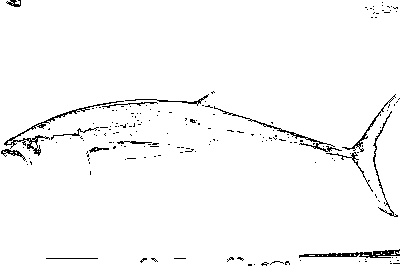

In [4]:
print(type(originalImage))
print(originalImage)
import imageio
im = Image.open("lena.bmp")
print(type(im))
print(im)
getRobertsImage(originalImage.convert('L'), 30)